In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
train_df = pd.read_csv('../data/train.csv', parse_dates=['date']).drop(columns='id')
train_df.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [5]:
pivoted = pd.pivot(train_df, index='date', columns=['family', 'store_nbr'], values='sales')
promotions = pd.pivot(train_df, index='date', columns=['family', 'store_nbr'], values='onpromotion')
pivoted.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
store_nbr,1,1,1,1,1,1,1,1,1,1,...,9,9,9,9,9,9,9,9,9,9
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,...,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000
2013-01-02,2.0,0.0,2.0,1091.0,0.0,470.652,0.0,1060.0,579.0,164.069,...,0.0,374.531,482.0,0.0,0.0,651.292,83.0,0.0,0.0,29.214
2013-01-03,3.0,0.0,0.0,919.0,0.0,310.655,0.0,836.0,453.0,151.582,...,0.0,400.863,372.0,0.0,0.0,509.496,66.0,0.0,0.0,25.000
2013-01-04,3.0,0.0,3.0,953.0,0.0,198.366,0.0,827.0,460.0,131.411,...,0.0,310.878,324.0,0.0,0.0,332.672,57.0,0.0,0.0,11.000
2013-01-05,5.0,0.0,3.0,1160.0,0.0,301.057,0.0,811.0,464.0,118.613,...,0.0,447.685,461.0,0.0,0.0,510.919,84.0,0.0,0.0,28.361


In [28]:
avg_sales = pivoted.mean(axis=1).to_frame('avg_sales').reset_index()
std_sales = pivoted.std(axis=1).to_frame('std_sales').reset_index()

In [29]:
std_sales.head()

,date,std_sales
0,2013-01-01,26.658379
1,2013-01-02,926.074635
2,2013-01-03,644.702700
3,2013-01-04,632.734510
4,2013-01-05,893.800062


<Axes: xlabel='date', ylabel='std_sales'>

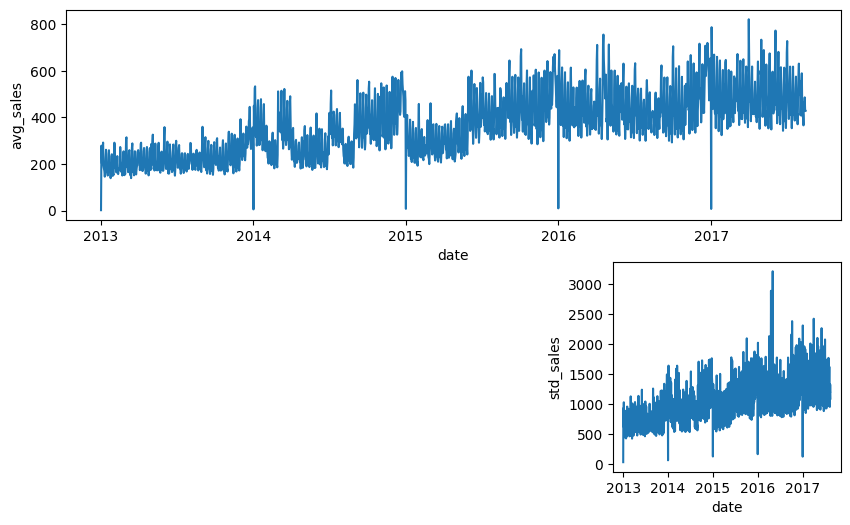

In [34]:
fig = plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_sales, x='date', y='avg_sales', ax=fig.add_subplot(2,1,1))
sns.lineplot(data=std_sales, x='date', y='std_sales', ax=fig.add_subplot(2,3,6))